In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


In [ ]:
df = df.dropna(subset=['Time'])
df['Games'] = pd.to_numeric(df['Games'])
df['Time'] = pd.to_numeric(df['Time'])


In [ ]:
X = df['Games'].values.reshape(-1, 1)
y = df['Time'].values


In [ ]:
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Linear Model: Time = {model.coef_[0]:.6f} * Year + {model.intercept_:.2f}")
print(f"R² = {r2:.4f}")


Linear Model: Time = -0.012578 * Year + 35.58
R² = 0.1860


In [ ]:
pred_2024 = model.predict([[2024]])[0]
pred_2300 = model.predict([[2300]])[0]

print(f"\nPredictions:")
print(f"2024: {pred_2024:.3f} seconds")
print(f"2300: {pred_2300:.3f} seconds")


Predictions:
2024: 10.126 seconds
2300: 6.654 seconds


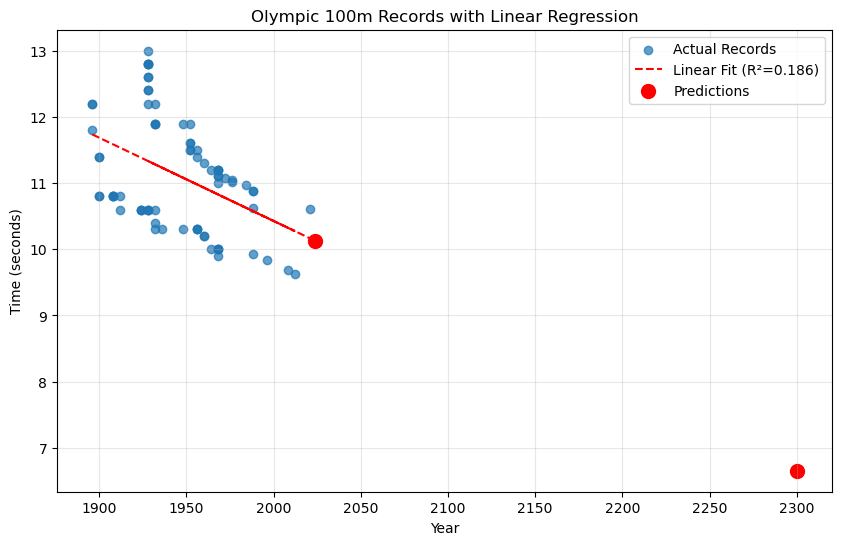


Model Validity:
2024 prediction: Reasonable (close extrapolation)
2300 prediction: Highly questionable (extreme extrapolation)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Games'], df['Time'], alpha=0.7, label='Actual Records')
plt.plot(df['Games'], y_pred, 'r--', label=f'Linear Fit (R²={r2:.3f})')
plt.scatter([2024, 2300], [pred_2024, pred_2300], color='red', s=100, label='Predictions')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.title('Olympic 100m Records with Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nModel Validity:")
print(f"2024 prediction: Reasonable (close extrapolation)")
print(f"2300 prediction: Highly questionable (extreme extrapolation)")
if pred_2300 < 0:
    print("WARNING: 2300 prediction is negative - physically impossible!")